This notebook is referenced from [Quantum Teleportation Algorithm — Programming on Quantum Computers Season 1Ep 5](https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=5)

In [254]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_hinton

qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.14.0', 'qiskit-aqua': '0.9.2', 'qiskit': '0.27.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Initialize 3 qubits and 3 bits

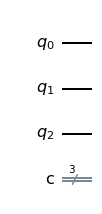

In [255]:
circuit = QuantumCircuit(3, 3)
_ = circuit.draw()

**All qubits are in state 0** `|000>`

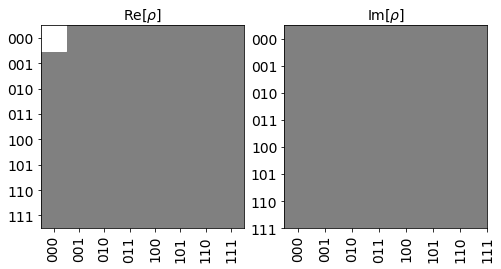

In [256]:
# All qubits are in state 0 -> |000>
_ = plot_state_hinton(circuit)

all bits are 0

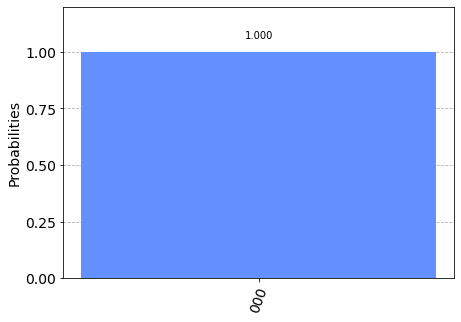

In [257]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

# Apply NOT gate on q0

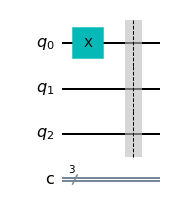

In [258]:
circuit.x(0)
circuit.barrier()
_ = circuit.draw()

**state 1 on q0** `|000> -> |001>`

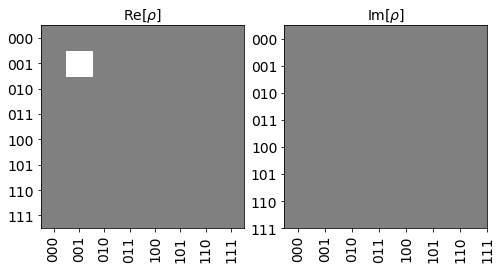

In [259]:
# state 1 on q0 -> |001>
_ = plot_state_hinton(circuit)

all bits are 0

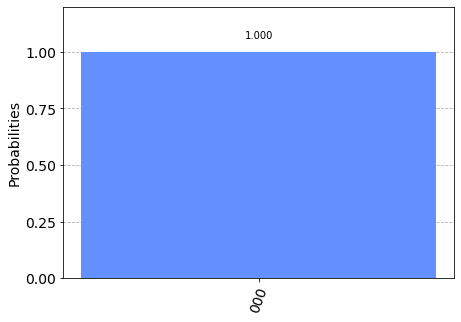

In [260]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

# Implement quantum teleportation protocol to transfer state 1 on q0 to q2

## Apply Hadamard gate on q1

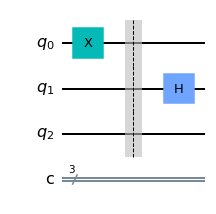

In [261]:
circuit.h(1)
_ = circuit.draw()

**q1 is in the superposition state** `|001> -> |001>, |011>`

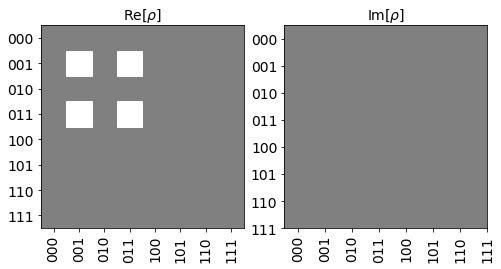

In [262]:
# q1 is in the superposition state |001> -> |001>, |011>
_ = plot_state_hinton(circuit)

all bits are 0

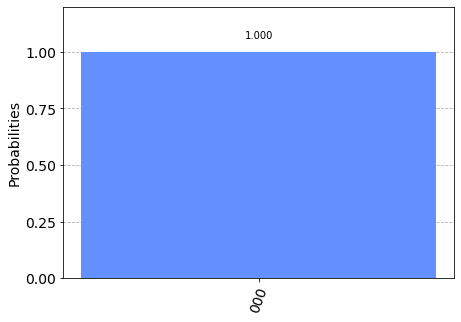

In [263]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

##  Apply Controlled X gate on q1 and q2

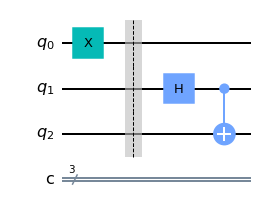

In [264]:
circuit.cx(1, 2)
_ = circuit.draw()

**"not" operation on q2** `|011> -> |111>`

**no "not" operation on q2** `|001> -> |001>`

**entanglement between q1 and q2 now** `|001>, |011> -> |001>, |111>`

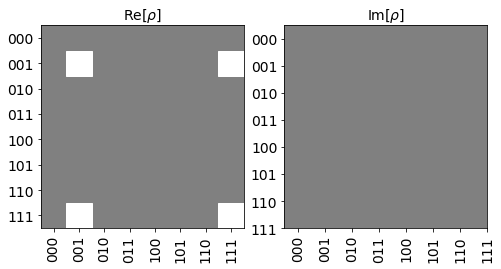

In [265]:
# "not" operation on q2 |011> -> |111>
# no "not" operation on q2 |001> -> |001>
# entanglement between q1 and q2 now |001>, |011> -> |001>, |111>
_ = plot_state_hinton(circuit)

all bits are 0

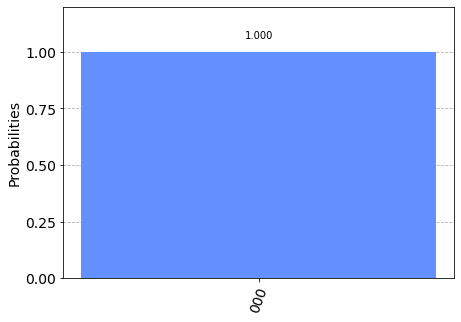

In [266]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Apply Controlled X gate on q0 and q1

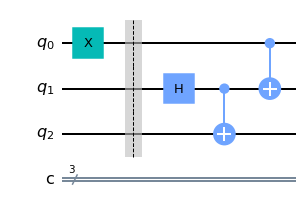

In [267]:
circuit.cx(0, 1)
_ = circuit.draw()

**not operation for q1** `|001>, |111> -> |011>, |101>`

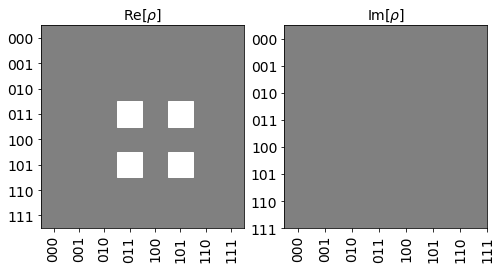

In [268]:
# not operation for q1 |001>, |111> -> |011>, |101>
_ = plot_state_hinton(circuit)

all bits are 0

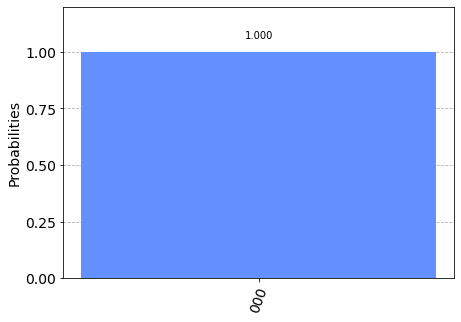

In [269]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Apply Hadamard gate on q0

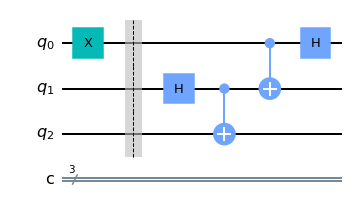

In [270]:
circuit.h(0)
_ = circuit.draw()

**q0 is in the superposition state** `|011> -> |010>, |011>`; `|101> -> |101>, |100>`

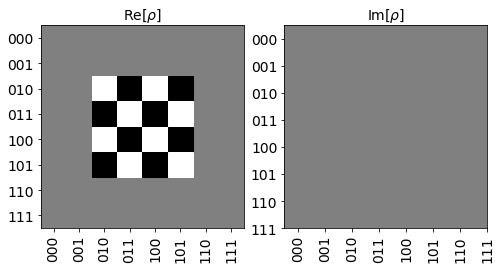

In [271]:
# q0 is in the superposition state |011> -> |010>, |011>; |101> -> |101>, |100>
_ = plot_state_hinton(circuit)

all bits are 0

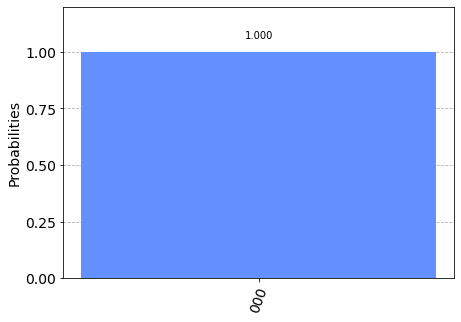

In [272]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Measure q0

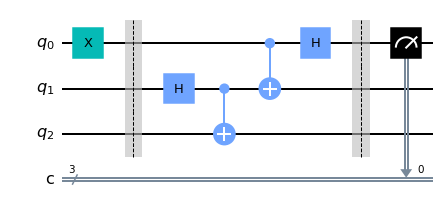

In [273]:
circuit.barrier()
circuit.measure(0, 0)
_ = circuit.draw()

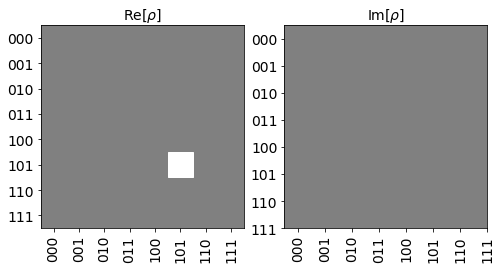

In [308]:
_ = plot_state_hinton(execute(circuit, backend=Aer.get_backend("statevector_simulator"), seed_simulator=2).result().get_statevector())

c0 = 0 or 1

c1 = 0

c2 = 0

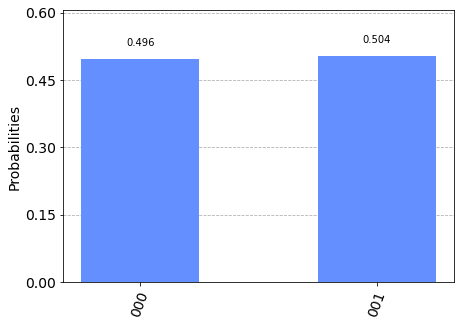

In [275]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Measure q1

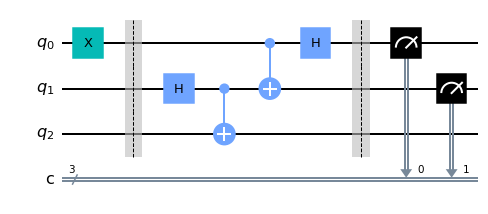

In [276]:
circuit.measure([1], [1])
_ = circuit.draw()

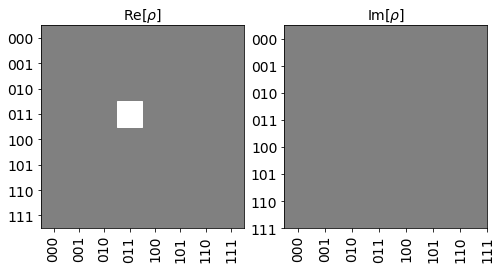

In [277]:
_ = plot_state_hinton(execute(circuit, backend=Aer.get_backend("statevector_simulator"), seed_simulator=2).result().get_statevector())

c0 = 0 or 1

c1 = 0 or 1

c2 = 0

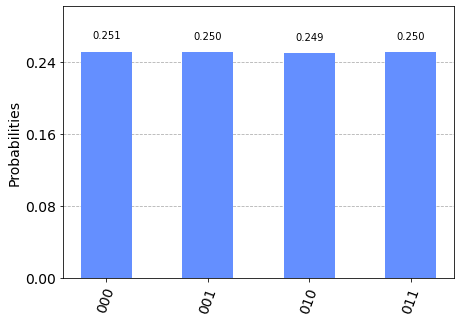

In [278]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Apply Controlled X on q1 and q2

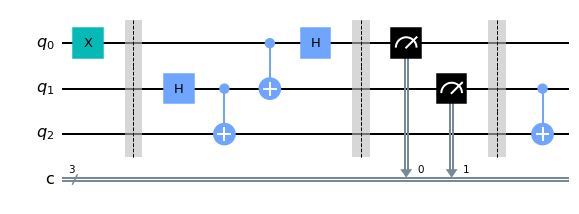

In [279]:
circuit.barrier()
circuit.cx(1, 2)
_ = circuit.draw()

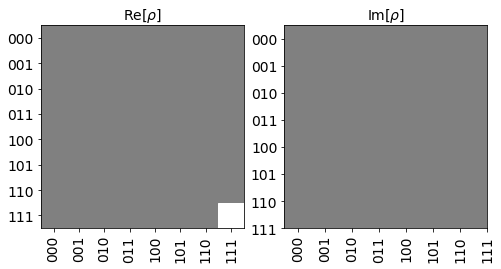

In [280]:
_ = plot_state_hinton(execute(circuit, backend=Aer.get_backend("statevector_simulator"), seed_simulator=2).result().get_statevector())

c0 = 0 or 1

c1 = 0 or 1

c2 = 0

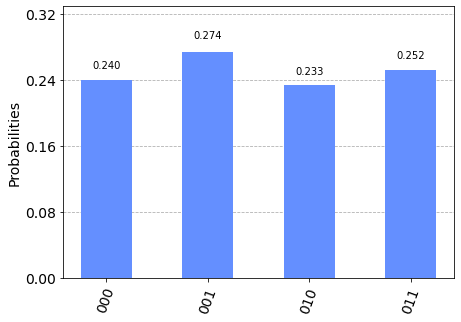

In [281]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Apply Controlled Z on q0 and q2

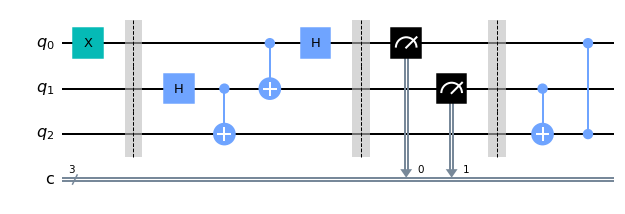

In [282]:
circuit.cz(0, 2)
_ = circuit.draw()

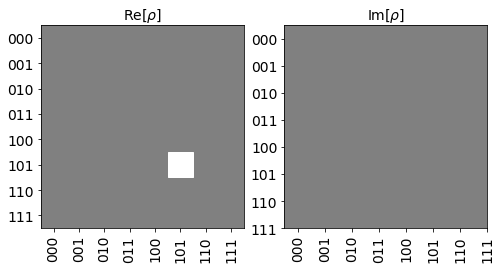

In [306]:
_ = plot_state_hinton(execute(circuit, backend=Aer.get_backend("statevector_simulator"), seed_simulator=2).result().get_statevector())

c0 = 0 or 1

c1 = 0 or 1

c2 = 0

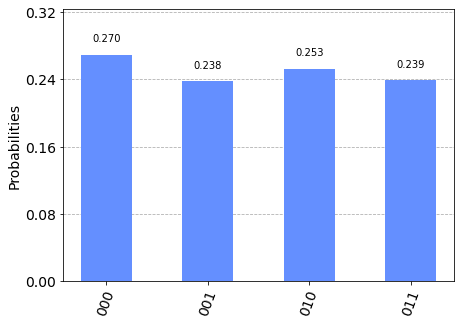

In [284]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)

## Measure q2

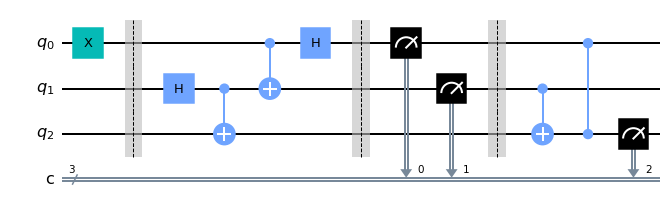

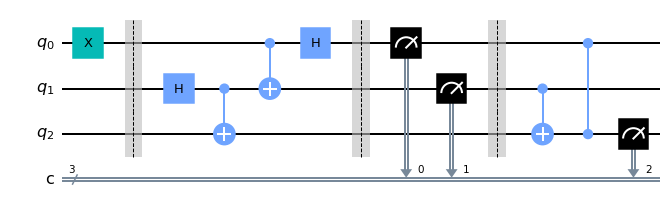

In [285]:
circuit.measure(2, 2)
_ = circuit.draw()

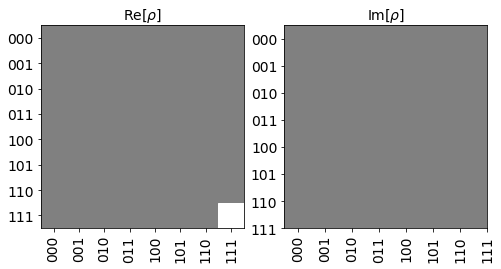

In [299]:
_ = plot_state_hinton(execute(circuit, backend=Aer.get_backend("statevector_simulator"), seed_simulator=2).result().get_statevector())

c0 = 0 or 1

c1 = 0 or 1

c2 = 1

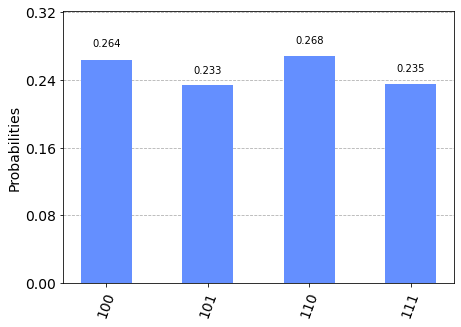

In [286]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
_ = plot_histogram(counts)